In [10]:
 #Cuisine Classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Load the dataset
df = pd.read_csv("/content/Dataset .csv")

# Select relevant columns
df_ml = df[['Cuisines', 'City', 'Average Cost for two', 'Aggregate rating']].copy()

# Drop rows with missing values
df_ml.dropna(inplace=True)

# Simplify 'Cuisines' to use only the first listed cuisine
df_ml['Cuisines'] = df_ml['Cuisines'].apply(lambda x: x.split(',')[0].strip())

# Encode 'Cuisines' column (Target variable)
cuisine_encoder = LabelEncoder()
df_ml['Cuisine_Label'] = cuisine_encoder.fit_transform(df_ml['Cuisines'])

# Encode 'City' column (Feature)
city_encoder = LabelEncoder()
df_ml['City_Label'] = city_encoder.fit_transform(df_ml['City'])

# Define features and target
X = df_ml[['City_Label', 'Average Cost for two', 'Aggregate rating']]
y = df_ml['Cuisine_Label']

# Feature scaling (important for logistic regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 1: Random Forest Classifier
RF_model = RandomForestClassifier(n_estimators=100, random_state=42)
RF_model.fit(X_train, y_train)

# 2: Logistic Regression (increased max_iter to avoid warning)
LR_model = LogisticRegression(max_iter=500, random_state=42)
LR_model.fit(X_train, y_train)

print(" Preprocessing and model training completed successfully!")


 Preprocessing and model training completed successfully!



 Random Forest Evaluation:
Accuracy: 0.2896804609743321
                 precision    recall  f1-score   support

        Afghani       0.00      0.00      0.00         1
       American       0.12      0.13      0.12        55
         Andhra       0.00      0.00      0.00         1
          Asian       0.00      0.00      0.00        17
   Asian Fusion       0.00      0.00      0.00         1
            BBQ       0.25      0.20      0.22         5
         Bakery       0.18      0.12      0.14       109
       Bar Food       0.00      0.00      0.00         6
        Bengali       0.00      0.00      0.00         4
      Beverages       0.00      0.00      0.00        13
        Biryani       0.50      0.05      0.08        22
      Brazilian       0.40      0.50      0.44         4
      Breakfast       0.00      0.00      0.00         3
        British       0.00      0.00      0.00         4
         Burger       0.00      0.00      0.00        31
        Burmese       0.00    

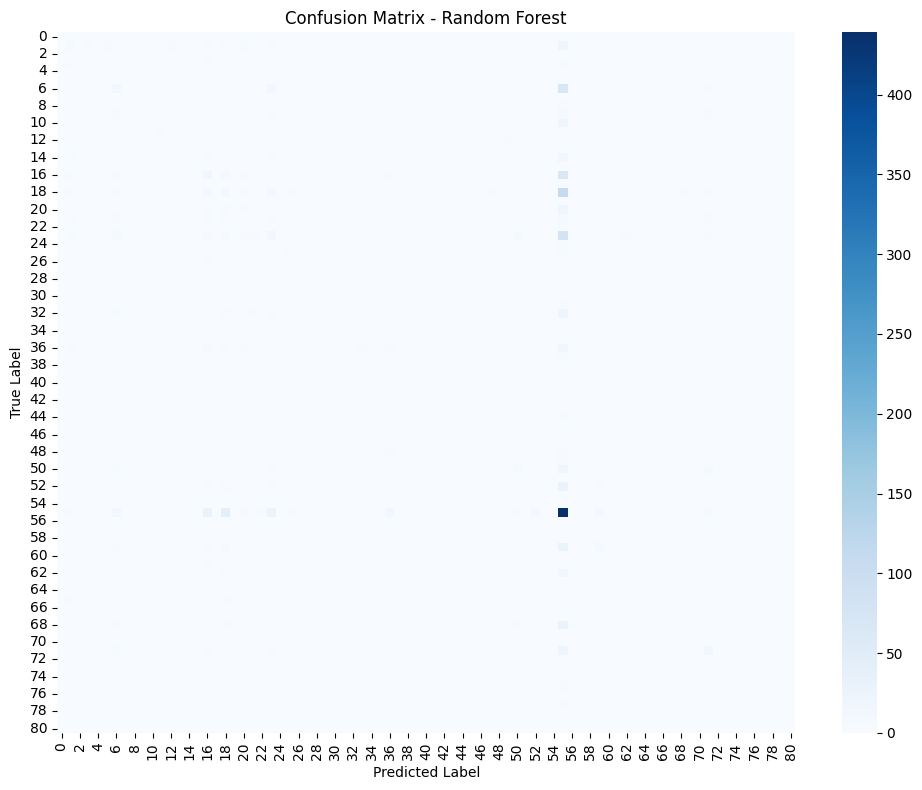

In [11]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

# Make predictions
RF_predictions = RF_model.predict(X_test)
LR_predictions = LR_model.predict(X_test)

# Get unique labels for consistency
unique_labels = sorted(np.unique(y_test))
target_names = [cuisine_encoder.classes_[label] for label in unique_labels]

print("\n Random Forest Evaluation:")
print("Accuracy:", accuracy_score(y_test, RF_predictions))
print(classification_report(
    y_test, RF_predictions, labels=unique_labels,
    target_names=target_names, zero_division=0
))

print("\nLogistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, LR_predictions))
print(classification_report(
    y_test, LR_predictions, labels=unique_labels,
    target_names=target_names, zero_division=0
))

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, RF_predictions, labels=unique_labels)
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score

RF_precision = precision_score(y_test, RF_predictions, average='weighted', zero_division=0)
RF_recall = recall_score(y_test, RF_predictions, average='weighted', zero_division=0)
RF_f1 = f1_score(y_test, RF_predictions, average='weighted', zero_division=0)

print("Random Forest:")
print("Precision:", round(RF_precision, 4))
print("Recall:", round(RF_recall, 4))
print("F1-Score:", round(RF_f1, 4))

LR_precision = precision_score(y_test, LR_predictions, average='weighted', zero_division=0)
LR_recall = recall_score(y_test, LR_predictions, average='weighted', zero_division=0)
LR_f1 = f1_score(y_test, LR_predictions, average='weighted', zero_division=0)

print("\n Logistic Regression:")
print("Precision:", round(LR_precision, 4))
print("Recall:", round(LR_recall, 4))
print("F1-Score:", round(LR_f1, 4))


Random Forest:
Precision: 0.2201
Recall: 0.2897
F1-Score: 0.2365

 Logistic Regression:
Precision: 0.1068
Recall: 0.3263
F1-Score: 0.1609


In [13]:
from sklearn.metrics import classification_report

unique_labels = sorted(set(y_test))

# Get all class names from the cuisine_encoder
all_class_names = cuisine_encoder.classes_

# Filter class names to match unique labels (if needed)
filtered_class_names = [all_class_names[label] for label in unique_labels]

# Get classification report as a dictionary
report_dict = classification_report(
    y_test, RF_predictions,
    labels=unique_labels,
    target_names=filtered_class_names,
    zero_division=0,
    output_dict=True
)

# Convert to DataFrame
report_df = pd.DataFrame(report_dict).T

# Drop non-cuisine rows if present
report_df = report_df[~report_df.index.isin(['accuracy', 'macro avg', 'weighted avg'])]

# Sort to find low-performing cuisines
low_performing = report_df.sort_values(by='f1-score').head(10)
top_performing = report_df.sort_values(by='f1-score', ascending=False).head(10)

# Show results
print(" Bottom 10 Performing Cuisines (by F1-score):")
print(low_performing[['precision', 'recall', 'f1-score']])

print("\n Top 10 Performing Cuisines (by F1-score):")
print(top_performing[['precision', 'recall', 'f1-score']])

 Bottom 10 Performing Cuisines (by F1-score):
              precision  recall  f1-score
Afghani             0.0     0.0       0.0
Andhra              0.0     0.0       0.0
Asian               0.0     0.0       0.0
Asian Fusion        0.0     0.0       0.0
Bar Food            0.0     0.0       0.0
British             0.0     0.0       0.0
Beverages           0.0     0.0       0.0
Bengali             0.0     0.0       0.0
Burger              0.0     0.0       0.0
Burmese             0.0     0.0       0.0

 Top 10 Performing Cuisines (by F1-score):
              precision    recall  f1-score
Sunda          1.000000  1.000000  1.000000
North Indian   0.407236  0.704655  0.516167
Brazilian      0.400000  0.500000  0.444444
Finger Food    0.454545  0.263158  0.333333
micro avg      0.291053  0.289680  0.290365
Street Food    0.309524  0.250000  0.276596
Indian         0.214286  0.300000  0.250000
BBQ            0.250000  0.200000  0.222222
Pizza          0.272727  0.176471  0.214286
Mithai  